In [69]:
library('afex')
library('emmeans')
# library('multicomp')
library('ggplot2')
afex_options(emmeans_model = 'multivariate')

library('dplyr')
library('car')

library(repr)
options(repr.plot.width=4, repr.plot.height=3)


# __Read results table__
created with [Python notebook](./2020_SVV.ipynb)

In [3]:
data <- read.csv(file = 'TableRes_delta.csv')
data

id,stim,freq,dSVV_mean,dSVV_std,dVel_mean,dVel_std
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
S40,AC,20,-0.67500000,-0.228501989,-0.61603339,-0.95462566
S40,AC,60,-0.03333333,-0.459897420,0.56464154,-0.62838990
S40,AC,120,-0.05000000,-0.094010186,-0.07464574,-0.49016465
S40,AC,160,-0.10833333,-0.059064481,-0.31750453,-0.68853187
S40,MF,20,0.44166667,-0.148514280,0.54194217,-0.35186438
S40,MF,60,-0.11666667,-0.309639733,-0.26055237,-1.00085964
S40,MF,120,-0.15000000,-0.148427069,0.05500727,-0.85891456
S40,MF,160,0.60833333,0.294927567,-0.14950852,-0.32889032
S41,AC,20,1.04698944,0.352716808,0.06882030,-0.07687681


___
# __ANOVA__ repeated measure

## __1. delta SVV__

### normality

In [54]:
shapiro.test(data$dSVV_mean)


	Shapiro-Wilk normality test

data:  data$dSVV_mean
W = 0.98471, p-value = 0.01115


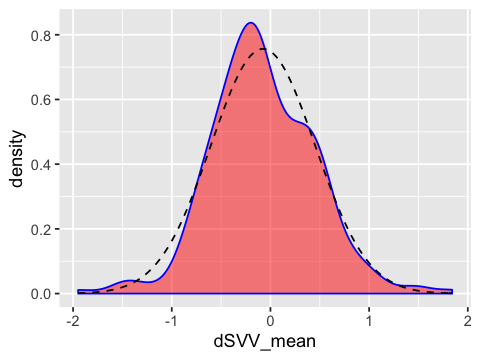

In [119]:
ggplot(data, aes(x=dSVV_mean)) +
    geom_density(color = 'blue', fill='red', alpha=0.5) +
    stat_function(fun = dnorm, args = list(mean = mean(data$dSVV_mean), sd = sd(data$dSVV_mean)), size=0.5, linetype='dashed')

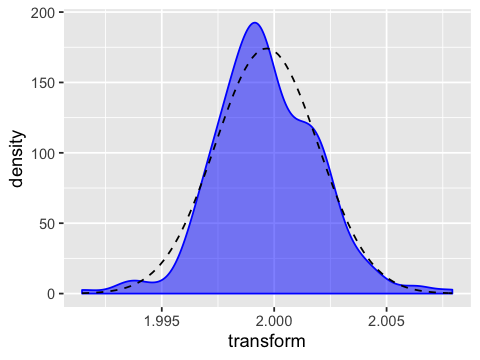

In [145]:
data$transform <- log10(data$dSVV_mean+100)
ggplot(data, aes(x=transform)) +
    geom_density(color = 'blue', fill='blue', alpha=0.5) +
    stat_function(fun = dnorm, args = list(mean = mean(data$transform), sd = sd(data$transform)), size=0.5, linetype='dashed')

In [146]:
shapiro.test(data$transform)


	Shapiro-Wilk normality test

data:  data$transform
W = 0.98492, p-value = 0.01213


ERROR: Error in library(moments): there is no package called ‘moments’


### ANOVA

In [12]:
RM_aov_SVV = aov_ez(id = 'id', 
                dv = 'dSVV_mean', 
                data = data, 
                within = c('stim', 'freq')
               )
nice(RM_aov_SVV)

Effect,df,MSE,F,ges,p.value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
stim,"1, 29",0.28,0.60,.003,.45
freq,"2.56, 74.22",0.16,1.97,.01,.13
stim:freq,"2.41, 69.87",0.20,1.87,.01,.15


In [13]:
summary(RM_aov_SVV)


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

             Sum Sq num Df Error SS den Df F value Pr(>F)
(Intercept) 1.37264      1  30.6654     29  1.2981 0.2639
stim        0.16567      1   8.0149     29  0.5994 0.4451
freq        0.82149      3  12.0887     87  1.9707 0.1243
stim:freq   0.88992      3  13.7925     87  1.8711 0.1404


Mauchly Tests for Sphericity

          Test statistic  p-value
freq             0.72016 0.105335
stim:freq        0.68396 0.061695


Greenhouse-Geisser and Huynh-Feldt Corrections
 for Departure from Sphericity

           GG eps Pr(>F[GG])
freq      0.85310     0.1346
stim:freq 0.80306     0.1537

             HF eps Pr(>F[HF])
freq      0.9427213  0.1282462
stim:freq 0.8809424  0.1483251

---
## __2. delta Adjustment Velocity__

In [148]:
shapiro.test(data$dVel_mean)


	Shapiro-Wilk normality test

data:  data$dVel_mean
W = 0.93298, p-value = 5.448e-09


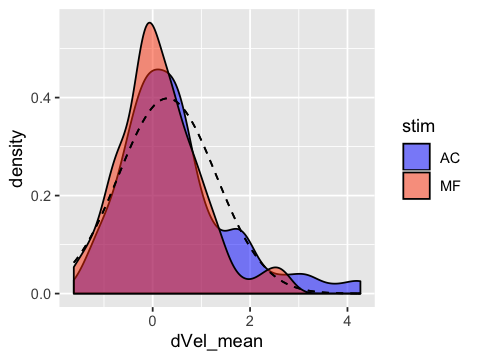

In [180]:

ggplot(data, aes(x=dVel_mean, fill=stim)) +
    geom_density(alpha=0.5) +
    stat_function(fun = dnorm, args = list(mean = mean(data$dVel_mean), sd = sd(data$dVel_mean)), size=0.5, linetype='dashed') +
    labs(fill='stim') +
    scale_fill_manual(values=c("blue","orangered"))

In [14]:
Vel_aov_RT = aov_ez(id = 'id', 
                dv = 'dVel_mean', 
                data = data, 
                within = c('stim', 'freq')
               )
nice(Vel_aov_RT)

Effect,df,MSE,F,ges,p.value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
stim,"1, 29",0.62,9.04 **,.02,.005
freq,"2.74, 79.52",0.41,1.70,.008,.18
stim:freq,"2.91, 84.44",0.41,0.28,.001,.84


In [15]:
summary(Vel_aov_RT)

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“HF eps > 1 treated as 1”


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

             Sum Sq num Df Error SS den Df F value   Pr(>F)   
(Intercept) 21.9453      1  147.050     29  4.3279 0.046436 * 
stim         5.5762      1   17.885     29  9.0418 0.005405 **
freq         1.8979      3   32.349     87  1.7014 0.172648   
stim:freq    0.3280      3   34.540     87  0.2754 0.842982   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Mauchly Tests for Sphericity

          Test statistic p-value
freq             0.84259 0.44767
stim:freq        0.95172 0.92741


Greenhouse-Geisser and Huynh-Feldt Corrections
 for Departure from Sphericity

           GG eps Pr(>F[GG])
freq      0.91407     0.1775
stim:freq 0.97056     0.8373

            HF eps Pr(>F[HF])
freq      1.018955  0.1726478
stim:freq 1.090528  0.8429817

___
## __3. delta SVV Std__

In [48]:
shapiro.test(data$dSVV_std)


	Shapiro-Wilk normality test

data:  data$dSVV_std
W = 0.98778, p-value = 0.03879


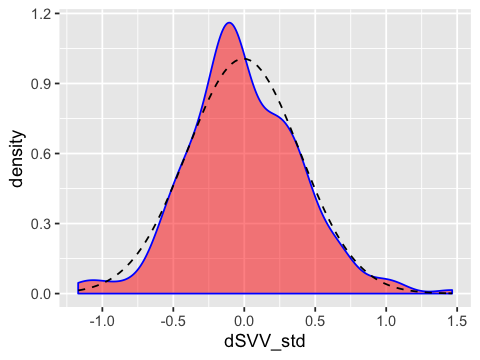

In [149]:
ggplot(data, aes(x=dSVV_std)) +
    geom_density(color = 'blue', fill='red', alpha=0.5) +
    stat_function(fun = dnorm, args = list(mean = mean(data$dSVV_std), sd = sd(data$dSVV_std)), size=0.5, linetype='dashed')

In [16]:
RM_aov_stdSVV = aov_ez(id = 'id', 
                dv = 'dSVV_std', 
                data = data, 
                within = c('stim', 'freq'),
                anova_table = list(correction = "none", es = "ges")
               )
nice(RM_aov_stdSVV)

Effect,df,MSE,F,ges,p.value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
stim,"1, 29",0.07,7.86 **,.02,.009
freq,"3, 87",0.10,0.31,.003,.82
stim:freq,"3, 87",0.07,0.76,.005,.52


In [17]:
summary(RM_aov_stdSVV)

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“HF eps > 1 treated as 1”


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

             Sum Sq num Df Error SS den Df F value   Pr(>F)   
(Intercept) 0.00861      1  19.5475     29  0.0128 0.910783   
stim        0.58360      1   2.1536     29  7.8587 0.008926 **
freq        0.09287      3   8.6136     87  0.3127 0.816176   
stim:freq   0.16836      3   6.4158     87  0.7610 0.518993   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Mauchly Tests for Sphericity

          Test statistic p-value
freq             0.69808 0.07645
stim:freq        0.89287 0.67840


Greenhouse-Geisser and Huynh-Feldt Corrections
 for Departure from Sphericity

           GG eps Pr(>F[GG])
freq      0.80740     0.7731
stim:freq 0.92697     0.5102

            HF eps Pr(>F[HF])
freq      0.886273  0.7922058
stim:freq 1.035211  0.5189935

___
## __4. delta Adj. Velocity Std__


In [11]:
RM_aov_stdVel = aov_ez(id = 'id', 
                dv = 'dVel_std', 
                data = data, 
                within = c('stim', 'freq'),
                anova_table = list(correction = "none", es = "ges")
               )
nice(RM_aov_stdVel)

Effect,df,MSE,F,ges,p.value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
stim,"1, 29",0.31,0.29,.001,.59
freq,"3, 87",0.24,1.25,.01,.30
stim:freq,"3, 87",0.15,0.65,.004,.59


# __POST-HOC__

In [20]:
m1 <- emmeans(RM_aov_stdSVV, ~ stim)
m1

NOTE: Results may be misleading due to involvement in interactions


 stim  emmean     SE   df lower.CL upper.CL
 AC   -0.0553 0.0558 35.3   -0.169    0.058
 MF    0.0433 0.0558 35.3   -0.070    0.157

Results are averaged over the levels of: freq 
Confidence level used: 0.95 

In [24]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.15.6

Matrix products: default
BLAS/LAPACK: /Users/sebastienvillard/anaconda3/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.2.1 emmeans_1.4.4 afex_0.26-0   lme4_1.1-21   Matrix_1.2-18

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3          mvtnorm_1.1-0       lattice_0.20-40    
 [4] zoo_1.8-8           digest_0.6.23       IRdisplay_0.7.0    
 [7] R6_2.4.1            cellranger_1.1.0    plyr_1.8.5         
[10] repr_1.1.0          evaluate_0.14       pillar_1.4.3       
[13] rlang_0.4.6         lazyeval_0.2.2      curl_4.3           
[16] multcomp_1.4-13     uuid_0.1-2          readxl_1.3.1       
[19] minqa_1.2.4         data.table_1.12.8   car_3.0-6          
[22] nloptr_1.2.1        

___
# __Non parametric ANOVA with repeated measure__
Find ```ARTool``` info [there](http://depts.washington.edu/acelab/proj/art/index.html)

In [183]:
library(ARTool)

In [186]:
summary(data)

       id      stim          freq       dSVV_mean           dSVV_std       
 S40    :  8   AC:120   Min.   : 20   Min.   :-1.94863   Min.   :-1.17041  
 S41    :  8   MF:120   1st Qu.: 50   1st Qu.:-0.40239   1st Qu.:-0.24056  
 S42    :  8            Median : 90   Median :-0.11943   Median :-0.04356  
 S43    :  8            Mean   : 90   Mean   :-0.07563   Mean   :-0.00599  
 S44    :  8            3rd Qu.:130   3rd Qu.: 0.28615   3rd Qu.: 0.25262  
 S48    :  8            Max.   :160   Max.   : 1.84164   Max.   : 1.46478  
 (Other):192                                                               
   dVel_mean          dVel_std           transform    
 Min.   :-1.6199   Min.   :-1.193874   Min.   :1.991  
 1st Qu.:-0.2731   1st Qu.:-0.376738   1st Qu.:1.998  
 Median : 0.1587   Median :-0.025681   Median :1.999  
 Mean   : 0.3024   Mean   :-0.003079   Mean   :2.000  
 3rd Qu.: 0.7143   3rd Qu.: 0.242248   3rd Qu.:2.001  
 Max.   : 4.2659   Max.   : 2.111908   Max.   :2.008  
       

In [192]:
m = art(data = data, formula = dSVV_mean ~ stim * freq + (1|id))
anova(m)

,Term,F,Df,Df.res,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
stim,stim,1.261806,1,203,0.26263614
freq,freq,3.026075,3,203,0.03061096
stim:freq,stim:freq,1.887908,3,203,0.13278676


In [189]:
data$stim = as.factor(data$stim)
data$freq = as.factor(data$freq)

In [193]:
emmeans(artlm(m, "freq"), pairwise ~ freq)

NOTE: Results may be misleading due to involvement in interactions


$emmeans
 freq emmean   SE   df lower.CL upper.CL
 20      108 10.8 56.6     86.6      130
 60      113 10.8 56.6     91.8      135
 120     127 10.8 56.6    105.4      149
 160     133 10.8 56.6    111.9      155

Results are averaged over the levels of: stim 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast  estimate   SE  df t.ratio p.value
 20 - 60      -5.28 9.53 203 -0.555  0.9452 
 20 - 120    -18.82 9.53 203 -1.975  0.2008 
 20 - 160    -25.30 9.53 203 -2.656  0.0422 
 60 - 120    -13.53 9.53 203 -1.421  0.4880 
 60 - 160    -20.02 9.53 203 -2.101  0.1562 
 120 - 160    -6.48 9.53 203 -0.681  0.9044 

Results are averaged over the levels of: stim 
Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 
